# K- Nearest Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np

## Database

In [2]:
data=pd.read_parquet('accident_vehicle_preprocessed.parquet')
data.head()

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
0,3.000000,0,5.268217,8268.00000,1,6,93,8118,5,1,...,0,30,1,1,2005,0,17,5,1,45.0
1,5.000000,3,3.000000,8300.00000,1,8,93,8118,5,1,...,3,30,1,1,2005,0,0,6,1,35.0
2,10.000000,0,5.268217,85.00000,2,8,140,8118,8,1,...,3,30,1,1,2005,0,21,10,1,55.0
3,6.402357,0,5.268217,2142.73833,2,0,15,3699,0,1,...,3,30,1,1,2005,0,20,13,1,35.0
4,4.000000,3,6.000000,4266.00000,2,0,240,12714,8,1,...,3,30,1,1,2005,0,20,13,1,45.0


In [3]:
#data=df_pre[df_pre['Accident_Severity']>0]
data['Accident_Severity'].value_counts()

0    420767
1     59062
2      6695
Name: Accident_Severity, dtype: int64

In [4]:
inputs=data.drop('Accident_Severity', axis=1)
target=data.Accident_Severity

In [5]:
inputs.shape, target.shape

((486524, 48), (486524,))

## Creating a train-test split

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target) 

## Creating the model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 40, weights ='distance')

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40, weights='distance')

## Make predictions on the test dataset

In [8]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(97305,)

## Construct the confusion matrix

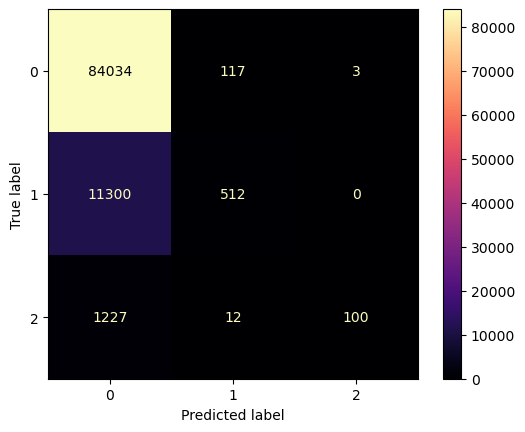

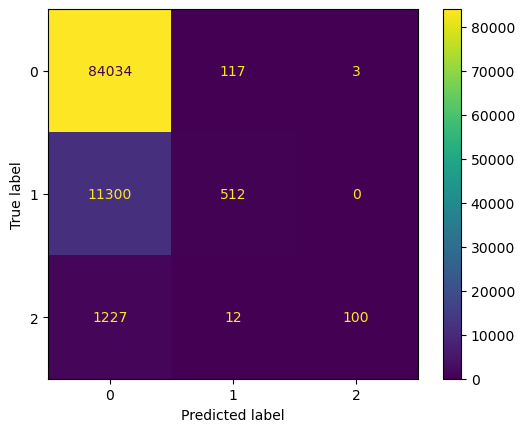

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
#confusion_matrix1= confusion_matrix(y_test, y_test_pred)
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

## Print out the classification report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names = ['Slight','Serious', 'Fatal']))

              precision    recall  f1-score   support

      Slight       0.87      1.00      0.93     84154
     Serious       0.80      0.04      0.08     11812
       Fatal       0.97      0.07      0.14      1339

    accuracy                           0.87     97305
   macro avg       0.88      0.37      0.38     97305
weighted avg       0.86      0.87      0.82     97305



# Handling class imbalance

## Random Undersampling

In [11]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

ns=RandomUnderSampler(random_state=43)
x_train_ns, y_train_ns=ns.fit_resample(x_train,y_train)
print("The number of classes before ns {}".format(Counter(y_train)))
print("The number of classes after ns {}".format(Counter(y_train_ns)))

The number of classes before ns Counter({0: 336613, 1: 47250, 2: 5356})
The number of classes after ns Counter({0: 5356, 1: 5356, 2: 5356})


In [12]:
clf

KNeighborsClassifier(n_neighbors=40, weights='distance')

In [13]:
clf.fit(x_train_ns, y_train_ns)

KNeighborsClassifier(n_neighbors=40, weights='distance')

In [14]:
y_test_pred_ns=clf.predict(x_test)

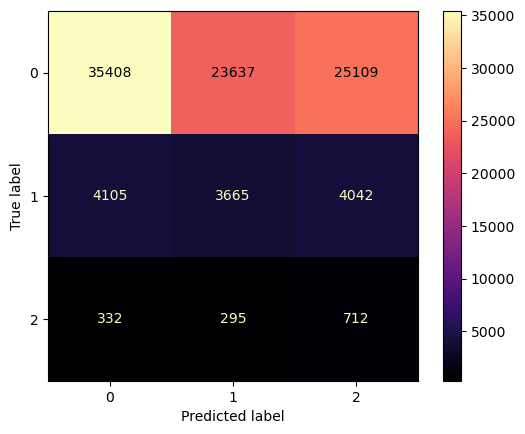

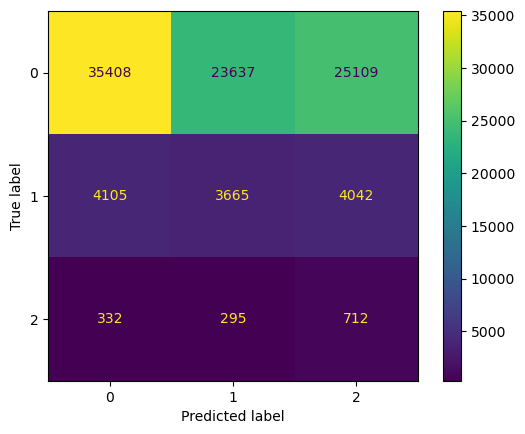

In [15]:
import matplotlib.pyplot as plt
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_ns,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

In [16]:
print(classification_report(y_test, y_test_pred_ns, target_names = ['Slight','Serious', 'Fatal']))

              precision    recall  f1-score   support

      Slight       0.89      0.42      0.57     84154
     Serious       0.13      0.31      0.19     11812
       Fatal       0.02      0.53      0.05      1339

    accuracy                           0.41     97305
   macro avg       0.35      0.42      0.27     97305
weighted avg       0.78      0.41      0.52     97305



# Changing Classifier Parameters

## Changing n_neighbors

In [17]:
clf = KNeighborsClassifier(n_neighbors = 49, weights ='distance')

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [18]:
y_test_pred = clf.predict(x_test)

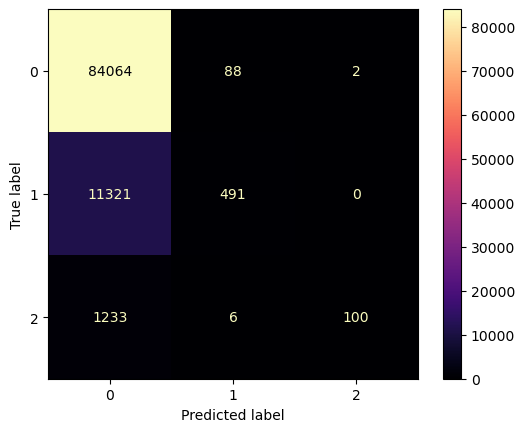

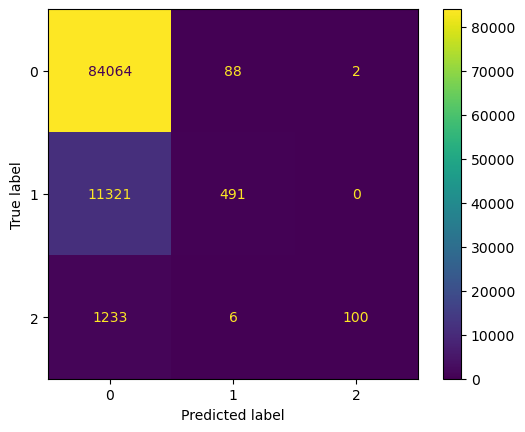

In [19]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

### Undersampled

In [20]:
clf.fit(x_train_ns, y_train_ns)

KNeighborsClassifier(n_neighbors=49, weights='distance')

In [21]:
y_test_pred_ns = clf.predict(x_test)

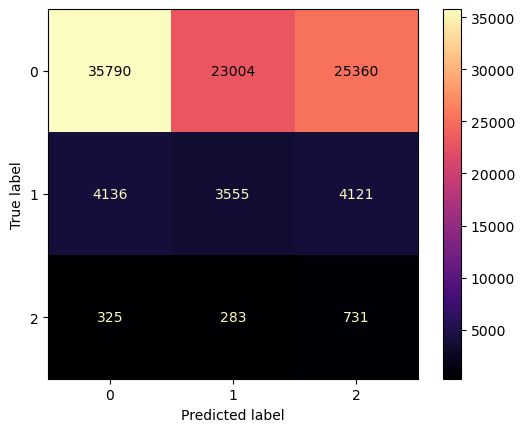

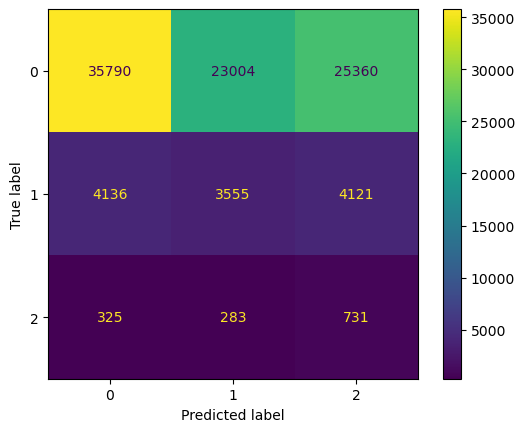

In [22]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_ns,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

In [23]:
print(classification_report(y_test, y_test_pred_ns, target_names = ['Slight','Serious', 'Fatal']))

              precision    recall  f1-score   support

      Slight       0.89      0.43      0.58     84154
     Serious       0.13      0.30      0.18     11812
       Fatal       0.02      0.55      0.05      1339

    accuracy                           0.41     97305
   macro avg       0.35      0.42      0.27     97305
weighted avg       0.79      0.41      0.52     97305



# Merging Serious and Fatal

In [24]:
data['Accident_Severity']=data['Accident_Severity'].replace(to_replace=2, value=1)

In [25]:
data['Accident_Severity'].value_counts()

0    420767
1     65757
Name: Accident_Severity, dtype: int64

In [26]:
inputs=data.drop('Accident_Severity', axis=1)
target=data.Accident_Severity

In [27]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target) 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 40, weights ='distance')

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40, weights='distance')

In [29]:
y_test_pred = clf.predict(x_test)

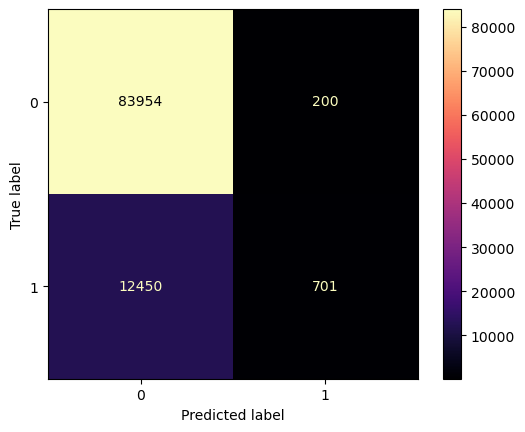

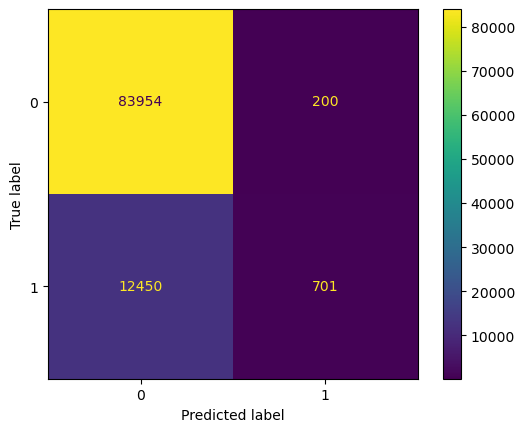

In [30]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

In [31]:
print(classification_report(y_test, y_test_pred, target_names = ['Slight', 'Serious+Fatal']))

               precision    recall  f1-score   support

       Slight       0.87      1.00      0.93     84154
Serious+Fatal       0.78      0.05      0.10     13151

     accuracy                           0.87     97305
    macro avg       0.82      0.53      0.51     97305
 weighted avg       0.86      0.87      0.82     97305



## Undersampled

In [32]:
ns=RandomUnderSampler(random_state=43)
x_train_ns, y_train_ns=ns.fit_resample(x_train,y_train)
print("The number of classes before ns {}".format(Counter(y_train)))
print("The number of classes after ns {}".format(Counter(y_train_ns)))

The number of classes before ns Counter({0: 336613, 1: 52606})
The number of classes after ns Counter({0: 52606, 1: 52606})


In [33]:
clf.fit(x_train_ns,y_train_ns)

KNeighborsClassifier(n_neighbors=40, weights='distance')

In [34]:
y_test_pred_ns=clf.predict(x_test)

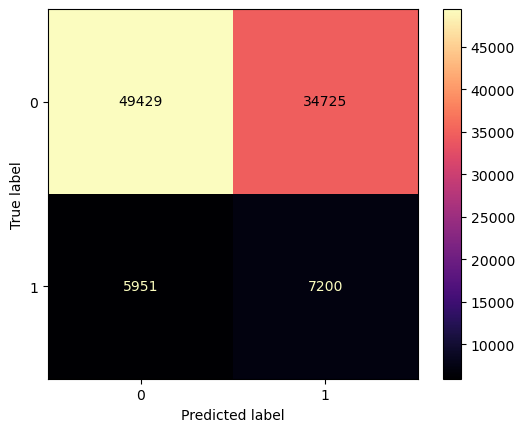

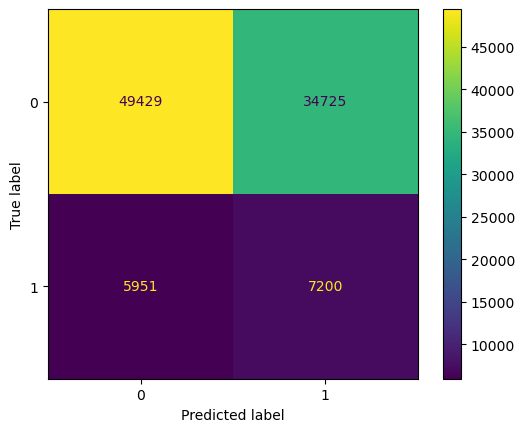

In [35]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_ns,
    labels = clf.classes_,
    cmap = 'magma'
).plot()
plt.show()

In [36]:
print(classification_report(y_test, y_test_pred_ns, target_names = ['Slight', 'Serious+Fatal']))

               precision    recall  f1-score   support

       Slight       0.89      0.59      0.71     84154
Serious+Fatal       0.17      0.55      0.26     13151

     accuracy                           0.58     97305
    macro avg       0.53      0.57      0.48     97305
 weighted avg       0.80      0.58      0.65     97305



In [ ]:
# number of true fatal predictions increased with decreasing n_neighbors.. maybe decrease n_neighbors even more?